# Arya's convolution

# Applying Convolutions for Data Clarification
## Week 09
The aim of this notebook is to emphasize on the desired features of a given image by applying convolutions. This procedure generates a more applicable dataset, which can be utilized for object detection. By having shapes that are more geometrically detectable, other algorithms can be used to count the number of stars.

## Brief Discription
### In Mathematics
In basic terms, convolution is a procedure that shows how the shape of one function changes after being combined with another function. The convolution of $f$ and $g$ can be written as:
$$\Large \left( f * g \right) (t) := \int_{- \infty}^{\infty} f (\tau) g(t - \tau) \, d \tau$$

---

### In Computer Science
In Deep Learning, a well-known class of artificial neural networks for analyzing images is called *Convolutional Neural Networks*.

![](https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1)

> source: [CNN - Developer's Breach](https://developersbreach.com/convolution-neural-network-deep-learning/)

# Libraries
The libraries used are listed in the cell below.

In [145]:
import numpy as np
import cv2
from scipy import ndimage

## Convolution
At first, three different methods were tested from the `ndimage.convolve()` method from the [SciPy Library](https://scipy.org/). However, due to poor results, the decision was made to implement the algorithm from scratch. The vertical edges were then detected in a more precise way, which helped with the quality of the final results.

In [146]:
def conv(image, kernel, kernel_size):
    if (kernel_size % 2 == 1):
        image_height, image_width = image.shape
        output_height = image_height - kernel_size + 1;
        output_width = image_width - kernel_size + 1;

        output = np.zeros((output_height, output_width))

        image_margin = (kernel_size -1 ) // 2
        for i in range(image_margin, image_height - image_margin):
            for j in range(image_margin, image_height - image_margin):
                image_segment =image[
                    i - image_margin : i + image_margin + 1,
                    j - image_margin : j + image_margin + 1
                ]
                multiplied = np.multiply(image_segment,kernel)
                cell_value = np.sum(multiplied)
                output[i - image_margin, j - image_margin] = cell_value
    else:
        print("Error: The kernel should be a odd x odd matrix.")
    return output

## Source Images
The image used below, `image_path`, had been obtained previously using the [Astropy library](https://www.astropy.org/). 

In [ ]:
image_path = "star.png"
im = cv2.imread(image_path)
grayim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

cv2.imwrite('ConvResults/im.png', im)
cv2.imwrite('ConvResults/grayscale_im.png', grayim)

## Choosing Kernels
The kernels below, represented by `k = np.array([...])`, are used for the convolution process. By testing and tweaking different values for their indices, one can come up with a better kernel.

### Experimental Kernels

In [204]:
exp_ker1 = np.array([
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.]])

exp_ker2 = np.array([
    [-1., 0., 1.],
    [-1., 0., 1.],
    [-1., 0., 1.]])

exp_ker3 = np.array([
       [0.1,0.1,0.1],
       [0.1,0.1,0.1],
       [0.1,0.1,0.1]])
exp_ker4 = np.array([
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  1., -4.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])

### The Chosen Kernel

In [205]:
k = np.array([
        [ -1., -1., -1., -1., -1.],
        [ -1.,  1.,  1.,  1., -1.],
        [ -1.,  1.,  4.,  1., -1.],
        [ -1.,  1.,  1.,  1., -1.],
        [ -1., -1., -1., -1., -1.]])

k3 = np.dstack([k, k, k])
kernel_size = k.shape[0]

## Generating the Final Results
After applying the algorithm, the convoluted images get stored in a separate folder, which is called *ConvResults*.

In [147]:
# convolce each rgb channel of image an then merge them...
# ... by stacking them on top of each other
output_r = ndimage.convolve(im[:,:,0], k, mode='constant', cval=0.0)
output_g = ndimage.convolve(im[:,:,1], k, mode='constant', cval=0.0)
output_b = ndimage.convolve(im[:,:,2], k, mode='constant', cval=0.0)
output1 = np.dstack([output_r, output_g, output_b])
cv2.imwrite('ConvResults/output1 - stacked.png', output1)

# convolve the colored image with a 3 dimensional kernel (3dim)
output2 = ndimage.convolve(im, k3, mode='constant', cval=0.0)
cv2.imwrite('ConvResults/output2 - 3dim.png', output2)

# convolve the grayscale image 
output3 = ndimage.convolve(grayim, k, mode='constant', cval=0.0)
cv2.imwrite('ConvResults/output3 - grayscale.png', output3)

# convolve the grayscale image with my own function 
output4 = conv(grayim, k, kernel_size)
output4_range = np.max(output4) - np.min(output4)
output4 = (output4 - np.min(output4)) * (255 / output4_range)
cv2.imwrite('ConvResults/output4 - func.png', output4)

True

# For Displaying the Final Images
The first image is the original one, and the second one is after 4 layers of convolution.

In [185]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Original Image

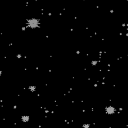

In [196]:
Image(filename='//data/notebook_files/ConvResults/im.png', width=256, height=256)

### Convoluted Image

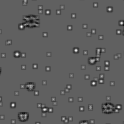

In [197]:
Image(filename='/data/notebook_files/ConvResults/output4 - func.png', width=256, height=256)

## For Comparison

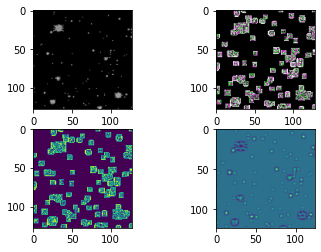

In [199]:
before_img = plt.imread("/data/notebook_files/ConvResults/im.png")
img2 = plt.imread("/data/notebook_files/ConvResults/output2 - 3dim.png")
img3 = plt.imread("/data/notebook_files/ConvResults/output3 - grayscale.png")
after_img = plt.imread("/data/notebook_files/ConvResults/output4 - func.png")

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(before_img)
axarr[1,0].imshow(img3)
axarr[0,1].imshow(img2)
axarr[1,1].imshow(after_img)